# Lab 3

In [72]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

# Task 1 - Split the dataset

In [73]:
df = pd.read_csv(r'C:\Users\solve\Titanic_Cleaned.csv', sep=',')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   HasCabin      1309 non-null   bool   
 6   CatAge        1309 non-null   int64  
 7   CatFare       1309 non-null   int64  
 8   Sex_male      1309 non-null   bool   
 9   Embarked_Q    1309 non-null   bool   
 10  Embarked_S    1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
 14  Title_Unique  1309 non-null   bool   
dtypes: bool(8), float64(1), int64(6)
memory usage: 81.9 KB


In [74]:
# Splits the dataset
df_train=df[df['Survived'].notnull()]
df_test=df[df['Survived'].isnull()]

#Resetter indekser
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

#Sjekker shapes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")


Training set shape: (891, 15)
Test set shape: (418, 15)


In [75]:
# Lagrer filene
df_test.to_csv(r'C:\Users\solve\test.csv', index=False)
df_train.to_csv(r'C:\Users\solve\train.csv', index=False)

#Henter filene
df_train = pd.read_csv(r'C:\Users\solve\train.csv')
df_test = pd.read_csv(r'C:\Users\solve\test.csv')

df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    float64
 2   Pclass        891 non-null    int64  
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   HasCabin      891 non-null    bool   
 6   CatAge        891 non-null    int64  
 7   CatFare       891 non-null    int64  
 8   Sex_male      891 non-null    bool   
 9   Embarked_Q    891 non-null    bool   
 10  Embarked_S    891 non-null    bool   
 11  Title_Miss    891 non-null    bool   
 12  Title_Mr      891 non-null    bool   
 13  Title_Mrs     891 non-null    bool   
 14  Title_Unique  891 non-null    bool   
dtypes: bool(8), float64(1), int64(6)
memory usage: 55.8 KB


In [76]:
df_test.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,892,NaN,3,0,0,False,2,0,True,True,False,False,True,False,False
1,893,NaN,3,1,0,False,3,0,False,False,True,False,False,True,False
2,894,NaN,2,0,0,False,3,1,True,True,False,False,True,False,False
3,895,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
4,896,NaN,3,1,1,False,0,1,False,False,True,False,False,True,False


# Task 2 - Create a New Feature 'TravelAlone'

In [77]:
#Oppretter ny kolonne som viser bool om en passasjer reiser alene:

conditions = [
    (df_train['SibSp'] > 0) | (df_train["Parch"] > 0),
    (df_train["SibSp"] == 0) & (df_train["Parch"] == 0)
]

values = [False, True]

df_train['TravelAlone'] = np.select(conditions, values)
df_train.head(10)

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False,1
5,6,0.0,3,0,0,False,1,1,True,True,False,False,True,False,False,1
6,7,0.0,1,0,0,True,3,3,True,False,True,False,True,False,False,1
7,8,0.0,3,3,1,False,0,2,True,False,True,False,False,False,False,0
8,9,1.0,3,0,2,False,1,1,False,False,True,False,False,True,False,0
9,10,1.0,2,1,0,False,0,2,False,False,False,False,False,True,False,0


In [78]:
# Dropper "SibSp" og "Parch"
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,False,2,1,True,False,True,False,True,False,False,1


# Task 3 - Explore data

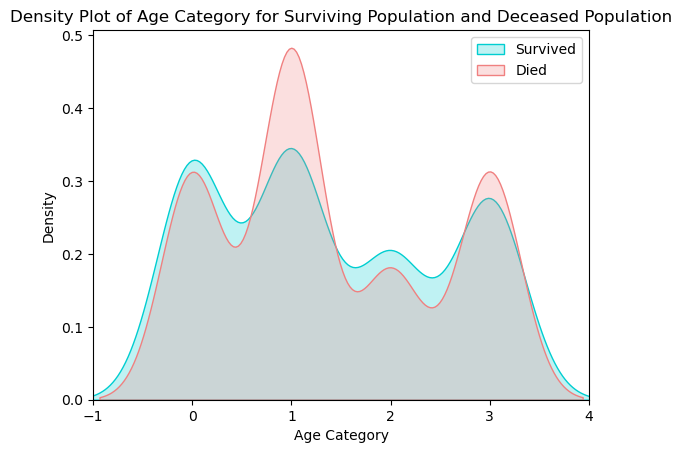

In [84]:
# Density plot surviveing vs Age Category
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age Category')
plt.xlim(-1,4)
plt.show()

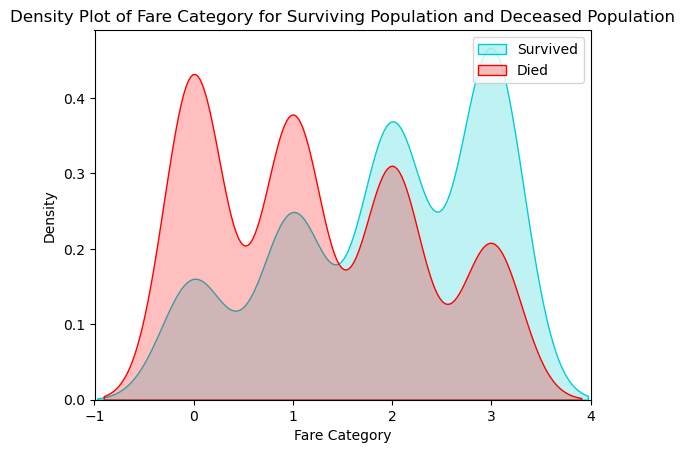

In [88]:
# Densityplot Fare vs Surviving
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="red", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='Fare Category')
plt.xlim(-1,4)
plt.show()

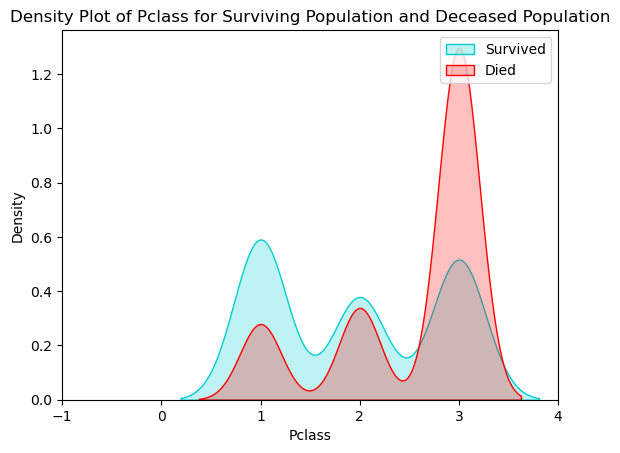

In [89]:
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="red", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Pclass for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass')
plt.xlim(-1,4)
plt.show()

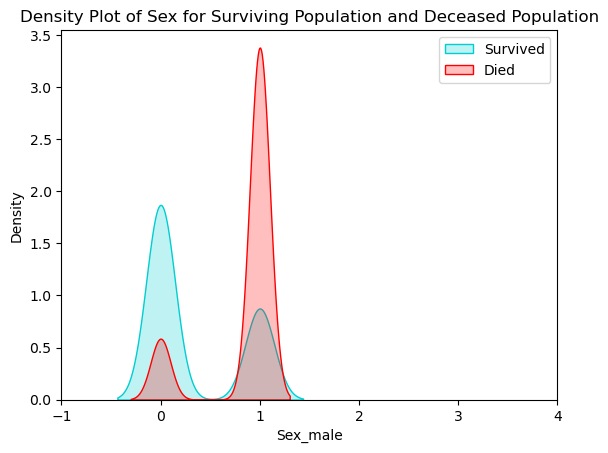

In [91]:
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="red", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Sex for Surviving Population and Deceased Population')
ax.set(xlabel='Sex_male')
plt.xlim(-1,4)
plt.show()

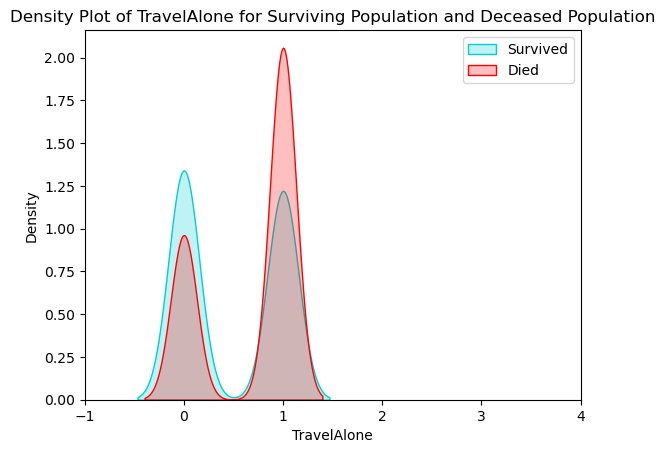

In [92]:
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="red", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of TravelAlone for Surviving Population and Deceased Population')
ax.set(xlabel='TravelAlone')
plt.xlim(-1,4)
plt.show()

Observasjoner:

Dersom du var mann, kom fra underklassen og reiste alene var det større sjangs for at du døde. Og motsatt, dersom du ikke reiste alene, var kvinne, og kom fra førsteklasse hadde man større sannsynlighet for å overleve. De som betalte mindre for billetten hadde også høyere sannsynlighet for å dø.

# Task 4 - Compute correlation matrix

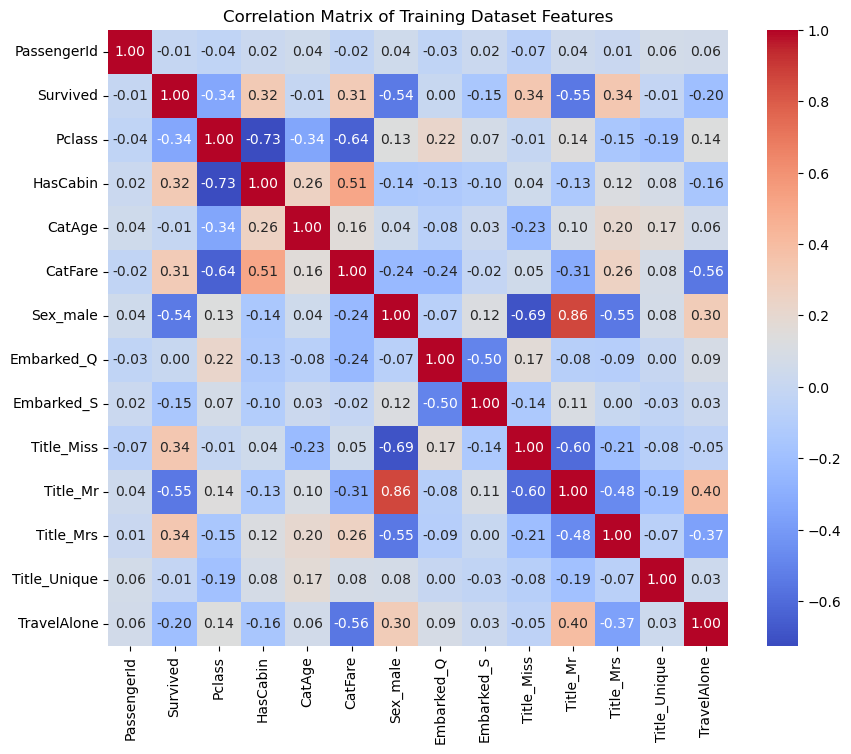

In [93]:
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

Obervasjoner:
1. 